# Indian Airlines Customer Satisfaction Analysis  

**By Sabiha Begum Mohammed**  
**ID:** W0836731  
**Section:** B  

The Indian airline industry has experienced a significant rise in customer numbers, along with an increase in the volume of customer reviews. In today's competitive environment, understanding what drives customer satisfaction and identifying the values necessary to maintain it have become crucial.  

This project aims to analyze customer reviews, extract actionable insights, and provide evidence-based recommendations to enhance and sustain customer satisfaction.  # Indian Airlines Customer Satisfaction Analysis  

**By:** Sabiha Begum Mohammed  
**ID:** W0836731  
**Section:** B  

## Introduction  
The Indian airline industry has experienced a significant rise in its customer base. Alongside this growth, the visibility of customer reviews has also increased, driven by heightened competition. In such a competitive environment, it is essential to analyze the factors that drive customer satisfaction and identify the values required to maintain it.  

This project aims to derive actionable insights from customer reviews and provide recommendations based on evidence-driven analysis.  

## Data Source  
The data for this analysis was sourced from Kaggle and includes comprehensive reviews of Indian airline customers.  

- **Primary Dataset:** [Indian Airlines Customer Reviews](https://www.kaggle.com/datasets/jagathratchakan/indian-airlines-customer-reviews)  

## Dataset Overview  
The dataset contains 2,211 rows of customer reviews across seven major airlines operating in India.  

---  
This project strives to deliver meaningful recommendations to help airlines enhance customer satisfaction effectively.  


In [3]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\sabih\Downloads\marketings analytics\mainproj\Indian_Domestic_Airline.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AirLine_Name  2210 non-null   object 
 1   Rating - 10   2206 non-null   float64
 2   Title         2210 non-null   object 
 3   Name          2210 non-null   object 
 4   Date          2210 non-null   object 
 5   Review        2210 non-null   object 
 6   Recommond     2210 non-null   object 
dtypes: float64(1), object(6)
memory usage: 121.0+ KB
None
    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date  \
0              

## Data Cleaning  
The dataset was examined for missing values, and it was found that four rows had missing data in the ratings column. These rows were removed to ensure the integrity and reliability of the analysis.  


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values per column
print("Missing Values in Each Column:")
print(missing_values)

# Total missing values
total_missing = missing_values.sum()
print(f"\nTotal Missing Values in Dataset: {total_missing}")


Missing Values in Each Column:
AirLine_Name    0
Rating - 10     4
Title           0
Name            0
Date            0
Review          0
Recommond       0
dtype: int64

Total Missing Values in Dataset: 4


In [5]:
# Drop rows where 'Rating - 10' has missing values
data = data.dropna(subset=['Rating - 10'])

# Verify that the missing values in 'Rating - 10' have been removed
missing_values_after_drop = data.isnull().sum()

print("\nMissing Values After Deleting Rows with Missing Ratings:")
print(missing_values_after_drop)



Missing Values After Deleting Rows with Missing Ratings:
AirLine_Name    0
Rating - 10     0
Title           0
Name            0
Date            0
Review          0
Recommond       0
dtype: int64



 **Review Column Cleaning:**  
   - The `Review` column was cleaned by removing the "Trip Verified" suffix.  
   - A new column, `TripVerified`, was created to indicate whether a review was marked as "Trip Verified" (values: Yes or No).  
   - These adjustments make the data more structured and suitable for future analysis.  
   - The original review column was delted as it was no longer needed.


In [6]:
# Define a function to process the Review column
def process_review(text):
    if "✅ Trip Verified |" in text:
        # Remove the prefix and mark as "yes" for trip_verified
        return text.replace("✅ Trip Verified |", "").strip(), "yes"
    else:
        # Mark as "no" for trip_verified
        return text.strip(), "no"

# Apply the function to create the new column and clean the review
data[['Clean_Review', 'Trip_Verified']] = data['Review'].apply(
    lambda x: pd.Series(process_review(x))
)

data.head()


,AirLine_Name,Rating - 10,Title,Name,Date,Review,Recommond,Clean_Review,Trip_Verified
0,AirAsia India,6.0,"""crew were welcoming""",V Bakshi,14th October 2023,✅ Trip Verified | I had booked this fare at a ...,yes,I had booked this fare at a very discounted ra...,yes
1,AirAsia India,1.0,"""furious and disappointed""",G Oscar,14th October 2023,✅ Trip Verified | I travel at least four times...,no,I travel at least four times a month and Air A...,yes
2,AirAsia India,10.0,"""amazing service and support""",Rahul Verma,14th October 2023,✅ Trip Verified | Taking this opportunity to a...,yes,Taking this opportunity to appreciate and than...,yes
3,AirAsia India,1.0,"""Waste of time and money""",G Akron,14th October 2023,✅ Trip Verified | The worst airlines in the hi...,no,The worst airlines in the history of mankind. ...,yes
4,AirAsia India,8.0,"""thumbs up to boarding crew""",Sirajudeen Jawahar ali,14th October 2023,✅ Trip Verified | Would like to give big thum...,yes,Would like to give big thumbs up to boarding c...,yes


In [ ]:
# Drop the original 'Review' column as it's no longer needed
data = data.drop(columns=['Review'])

# Verify the changes
print(data.head())


    AirLine_Name  Rating - 10                          Title  \
0  AirAsia India          6.0          "crew were welcoming"   
1  AirAsia India          1.0     "furious and disappointed"   
2  AirAsia India         10.0  "amazing service and support"   
3  AirAsia India          1.0      "Waste of time and money"   
4  AirAsia India          8.0   "thumbs up to boarding crew"   

                     Name               Date Recommond  \
0                V Bakshi  14th October 2023       yes   
1                 G Oscar  14th October 2023        no   
2             Rahul Verma  14th October 2023       yes   
3                 G Akron  14th October 2023        no   
4  Sirajudeen Jawahar ali  14th October 2023       yes   

                                        Clean_Review Trip_Verified  
0  I had booked this fare at a very discounted ra...           yes  
1  I travel at least four times a month and Air A...           yes  
2  Taking this opportunity to appreciate and than...       

**Standardization of Column Names:**  
   - The column names were standardized for consistency, ensuring they follow a uniform naming convention for ease of analysis.


In [13]:
# Standardize column names by making them lowercase and replacing spaces with underscores
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Display the updated column names
print("Standardized Column Names:")
print(data.columns)


Standardized Column Names:
Index(['airline_name', 'rating_-_10', 'title', 'name', 'date', 'recommond',
       'clean_review', 'trip_verified', 'review_length',
       'recommendation_numeric'],
      dtype='object')


**Date Column Formatting:**  
   - The `Date` column was reformatted to the `DD/MM/YYYY` format, facilitating easier time series analysis and improving the accuracy of temporal insights.


In [14]:
import pandas as pd

# Ensure the 'date' column exists
if 'date' in data.columns:
    print("Previewing the first few rows of the 'date' column before conversion:")
    print(data['date'].head())  # Preview the date column

    # Convert the 'date' column to datetime format (handles inconsistent formats)
    data['date'] = pd.to_datetime(data['date'], errors='coerce', dayfirst=True)

    # Handle missing or invalid dates
    invalid_dates_count = data['date'].isna().sum()
    if invalid_dates_count > 0:
        print(f"Found {invalid_dates_count} invalid/missing dates. They have been set to NaT.")

    print("Date column formatted and updated in the 'data' variable.")
else:
    print("The 'date' column does not exist in the dataset.")


Previewing the first few rows of the 'date' column before conversion:
0   2023-10-14
1   2023-10-14
2   2023-10-14
3   2023-10-14
4   2023-10-14
Name: date, dtype: datetime64[ns]
Found 388 invalid/missing dates. They have been set to NaT.
Date column formatted and updated in the 'data' variable.


## Exploratory Data Analysis (EDA)  

- The dataset columns were analyzed through both **univariate** and **bivariate** analysis:  
  - **Univariate analysis** was conducted to understand the distribution and characteristics of individual columns.  
  - **Bivariate analysis** was performed to explore relationships and correlations between pairs of variables.


### Univariate Analysis ###

Rating - Summary Statistics:
count    2206.000000
mean        4.033092
std         3.582053
min         1.000000
25%         1.000000
50%         2.000000
75%         8.000000
max        10.000000
Name: rating_-_10, dtype: float64


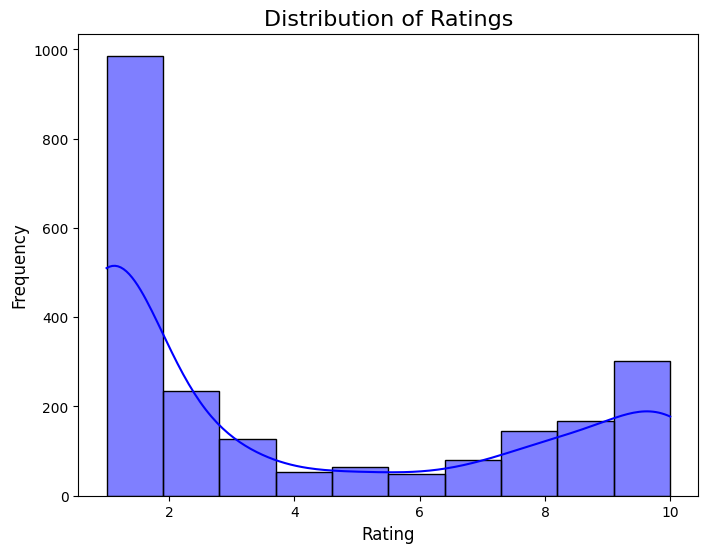

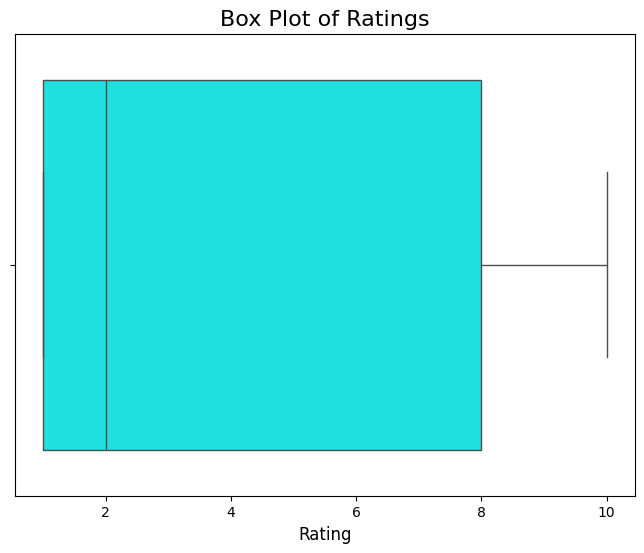


Airline Name - Frequency Distribution:
airline_name
AirIndia             550
SpiceJet             500
IndiGo               486
Vistara              260
Go First             180
AirAsia India        120
Air India Express    110
Name: count, dtype: int64


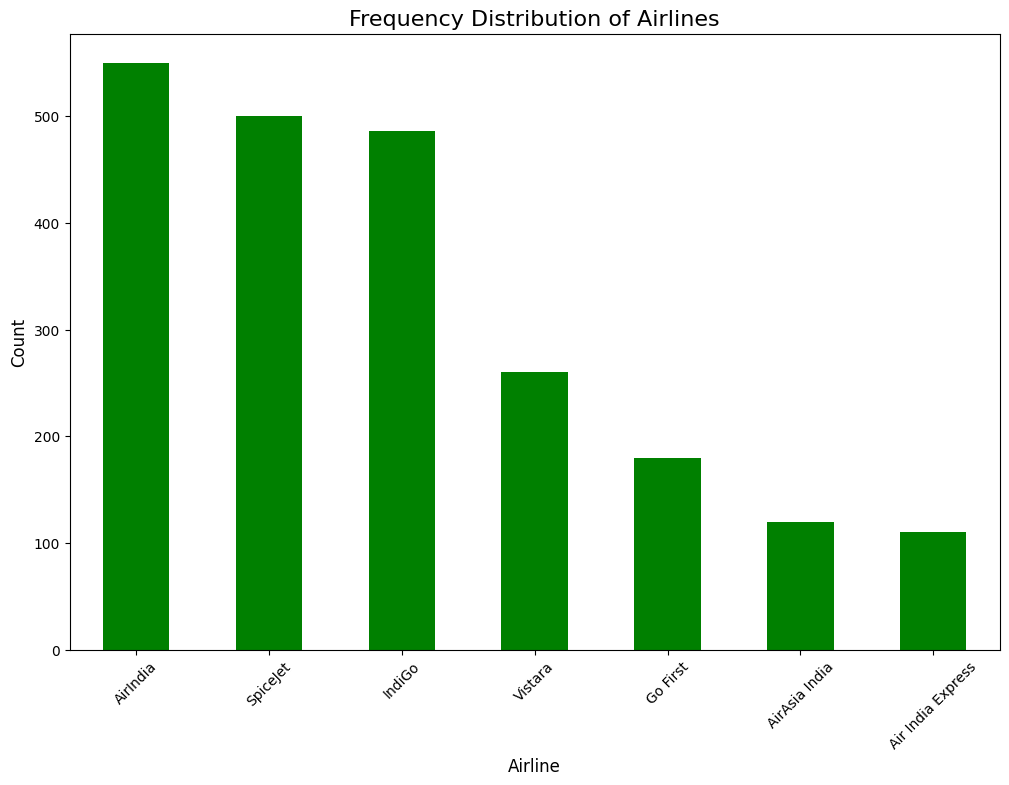

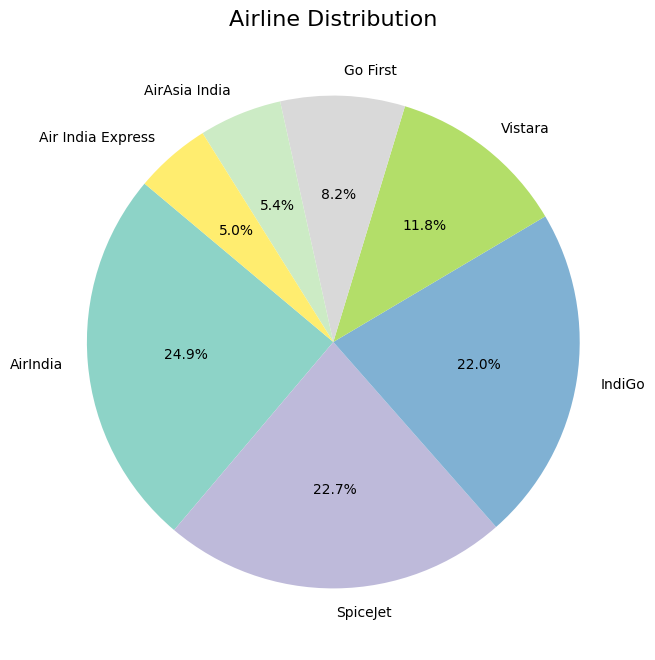


### Bivariate Analysis ###

Correlation between Rating and Review Length:
               rating_-_10  review_length
rating_-_10       1.000000      -0.152389
review_length    -0.152389       1.000000


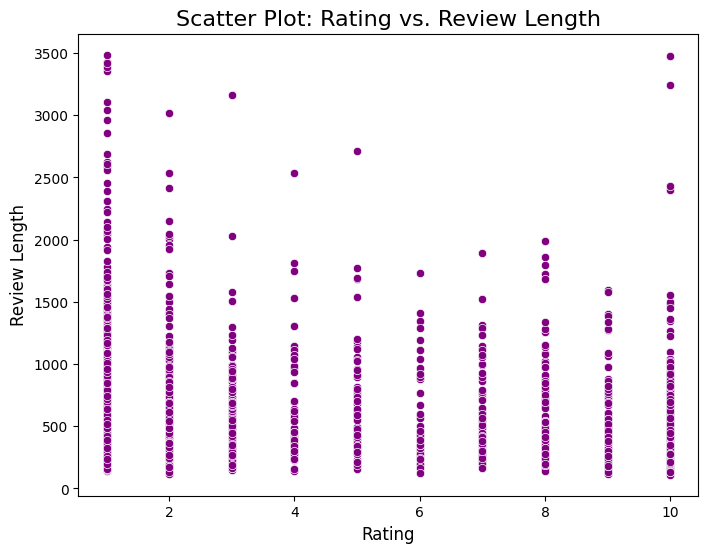

C:\Users\sabih\AppData\Local\Temp\ipykernel_23848\3995787829.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='airline_name', y='rating_-_10', data=data, palette='coolwarm')


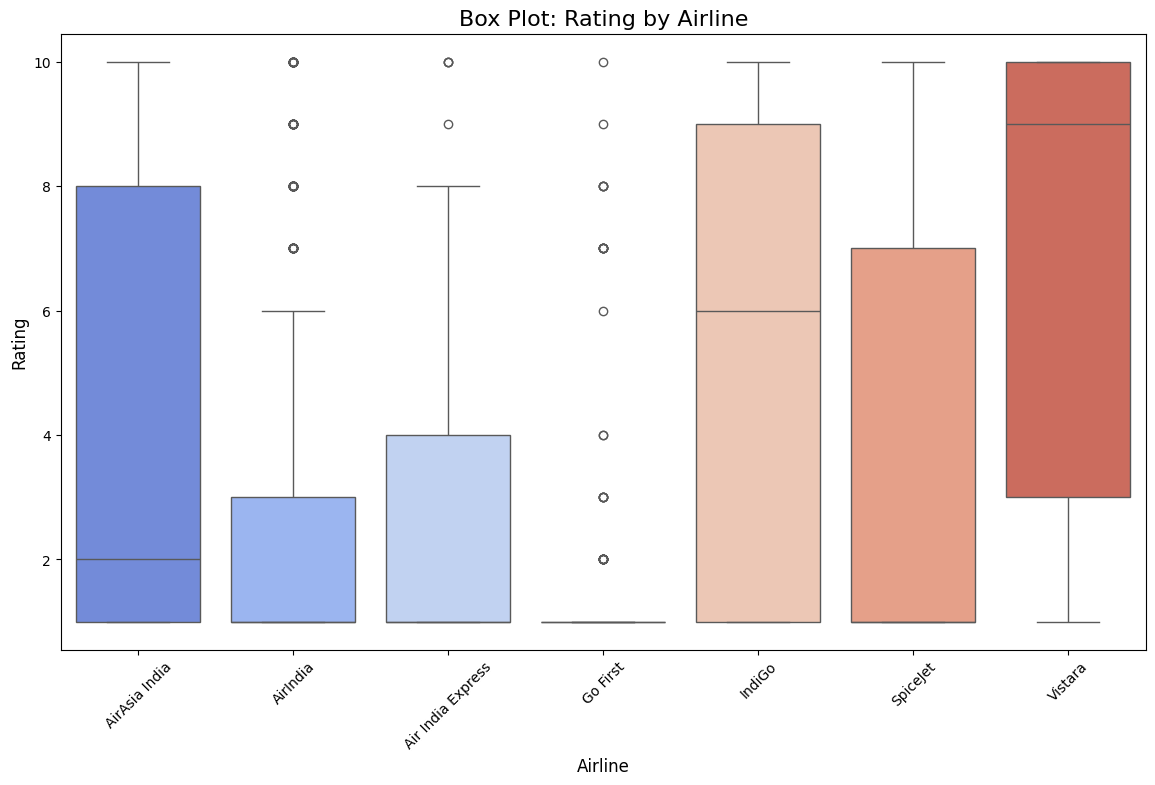

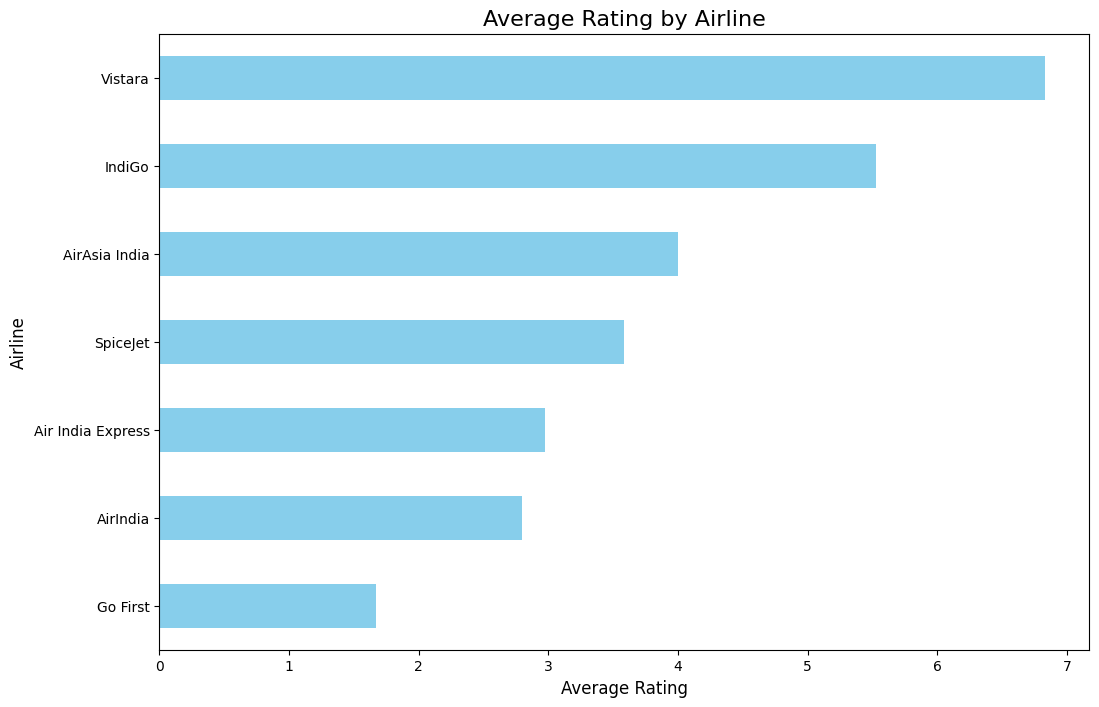


Contingency Table: Recommendations by Airline
recommond           no  yes
airline_name               
Air India Express   87   23
AirAsia India       79   41
AirIndia           444  106
Go First           167   13
IndiGo             237  249
SpiceJet           352  148
Vistara             78  182


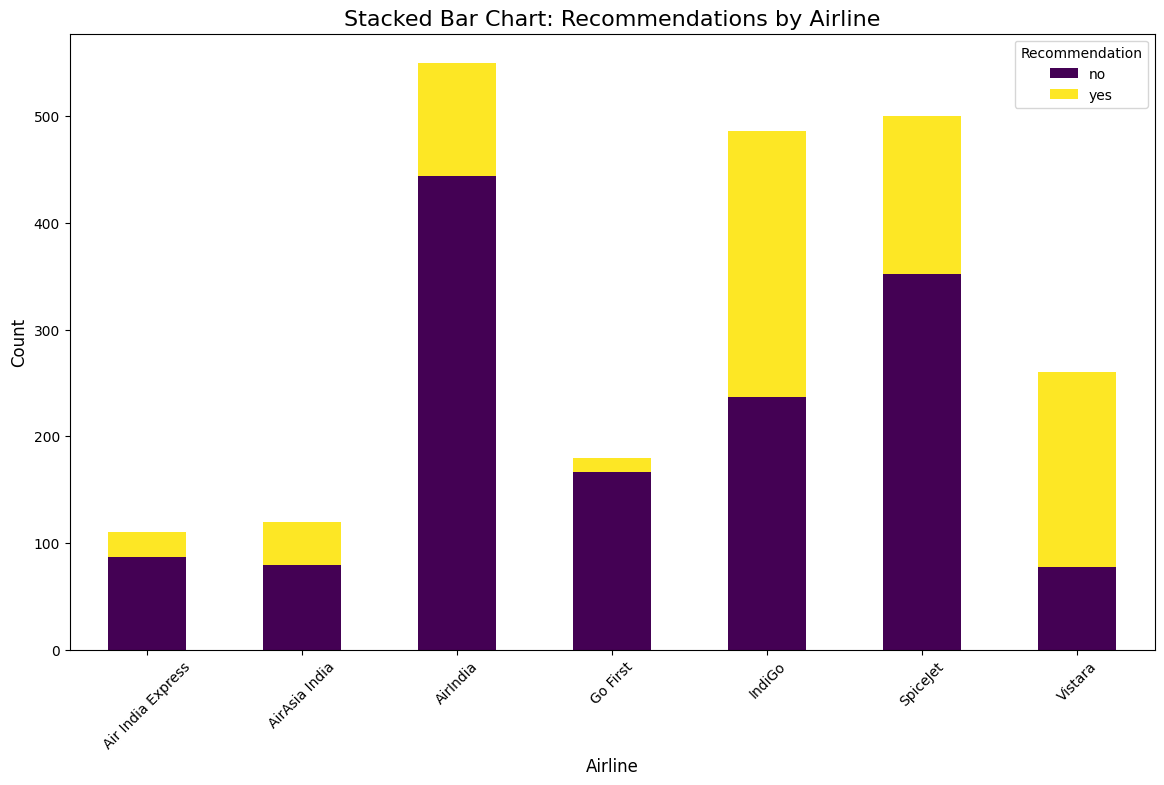


Correlation between Rating and Recommendation:
                        rating_-_10  recommendation_numeric
rating_-_10                1.000000                0.915665
recommendation_numeric     0.915665                1.000000


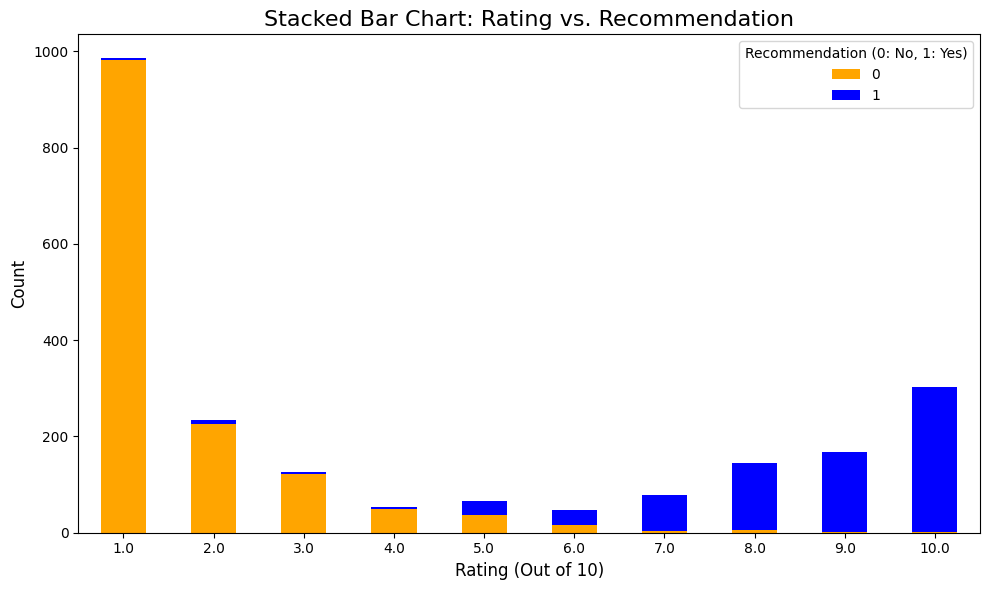

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
print("### Univariate Analysis ###")

# Numerical Variables: Rating
print("\nRating - Summary Statistics:")
print(data['rating_-_10'].describe())

# Histogram for Rating
plt.figure(figsize=(8, 6))
sns.histplot(data['rating_-_10'], bins=10, kde=True, color='blue')
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Box Plot for Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['rating_-_10'], color='cyan')
plt.title("Box Plot of Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.show()

# Categorical Variables: Airline Name
print("\nAirline Name - Frequency Distribution:")
print(data['airline_name'].value_counts())

# Bar Chart for Airline Name
plt.figure(figsize=(12, 8))
data['airline_name'].value_counts().plot(kind='bar', color='green')
plt.title("Frequency Distribution of Airlines", fontsize=16)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Airline Name
plt.figure(figsize=(10, 8))
data['airline_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title("Airline Distribution", fontsize=16)
plt.ylabel("")  # Remove y-label for better visualization
plt.show()

# Bivariate Analysis
print("\n### Bivariate Analysis ###")

# Numerical vs. Numerical: Rating vs. Review Length
data['review_length'] = data['clean_review'].str.len()

# Correlation
correlation = data[['rating_-_10', 'review_length']].corr(method='pearson')
print("\nCorrelation between Rating and Review Length:")
print(correlation)

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['rating_-_10'], y=data['review_length'], color='purple')
plt.title("Scatter Plot: Rating vs. Review Length", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Review Length", fontsize=12)
plt.show()

# Categorical vs. Numerical: Box Plot of Rating by Airline
plt.figure(figsize=(14, 8))
sns.boxplot(x='airline_name', y='rating_-_10', data=data, palette='coolwarm')
plt.title("Box Plot: Rating by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Bar Plot of Average Rating by Airline
avg_rating = data.groupby('airline_name')['rating_-_10'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_rating.plot(kind='barh', color='skyblue')
plt.title("Average Rating by Airline", fontsize=16)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Airline", fontsize=12)
plt.show()

# Categorical vs. Categorical: Recommendations by Airline
recommendation_counts = pd.crosstab(data['airline_name'], data['recommond'])
print("\nContingency Table: Recommendations by Airline")
print(recommendation_counts)

# Stacked Bar Chart
recommendation_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Stacked Bar Chart: Recommendations by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Recommendation")
plt.show()

data['recommendation_numeric'] = data['recommond'].apply(lambda x: 1 if x == 'yes' else 0)

correlation = data[['rating_-_10', 'recommendation_numeric']].corr(method='pearson')
print("\nCorrelation between Rating and Recommendation:")
print(correlation)

# Stacked Bar Chart
stacked_data = data.groupby(['rating_-_10', 'recommendation_numeric']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orange', 'blue'])
plt.title("Stacked Bar Chart: Rating vs. Recommendation", fontsize=16)
plt.xlabel("Rating (Out of 10)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Recommendation (0: No, 1: Yes)", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## Comprehensive Insights from Univariate and Bivariate Analysis  

**Overall, the analysis provides valuable insights into customer satisfaction with Indian airlines.**

### Key Insights:

1. **Rating Distribution:**  
   - A significant proportion of customers have provided negative or neutral feedback, as indicated by the right-skewed distribution of ratings.  
   - A few outliers with very high ratings suggest either exceptional experiences or possible biases in the dataset.  

2. **Airline Performance:**  
   - **Top-Performing Airlines:** Vistara and IndiGo consistently show higher average ratings and recommendation rates, indicating strong customer satisfaction.  
   - **Areas for Improvement:** Airlines like Go First and Air India Express have lower average ratings and recommendation rates, highlighting the need for service improvement.  

3. **Review Length and Rating:**  
   - A weak negative correlation between review length and rating suggests that longer reviews do not necessarily lead to higher ratings. Shorter reviews, often focused on specific positive experiences, may be linked to higher ratings.  

4. **Recommendation Distribution:**  
   - Air India, IndiGo, and SpiceJet show the highest number of reviews, implying wider customer reach
   - Vistara and Air India have a higher proportion of positive reviews, suggesting greater customer satisfaction.  
   - Go First has relatively fewer customer recommendations, suggesting room for improvement in service quality.  

5. **Air India Insights:**  
   - Despite having the highest number of reviews, Air India’s average ratings are the second-lowest, indicating potential areas for improvement in service quality and customer experience.  
6. **Rating and Recommendation:**
   - Stonger corelation between rating and recommendation is observed implying the likelyhood of higher rating when recomeded value is yes.


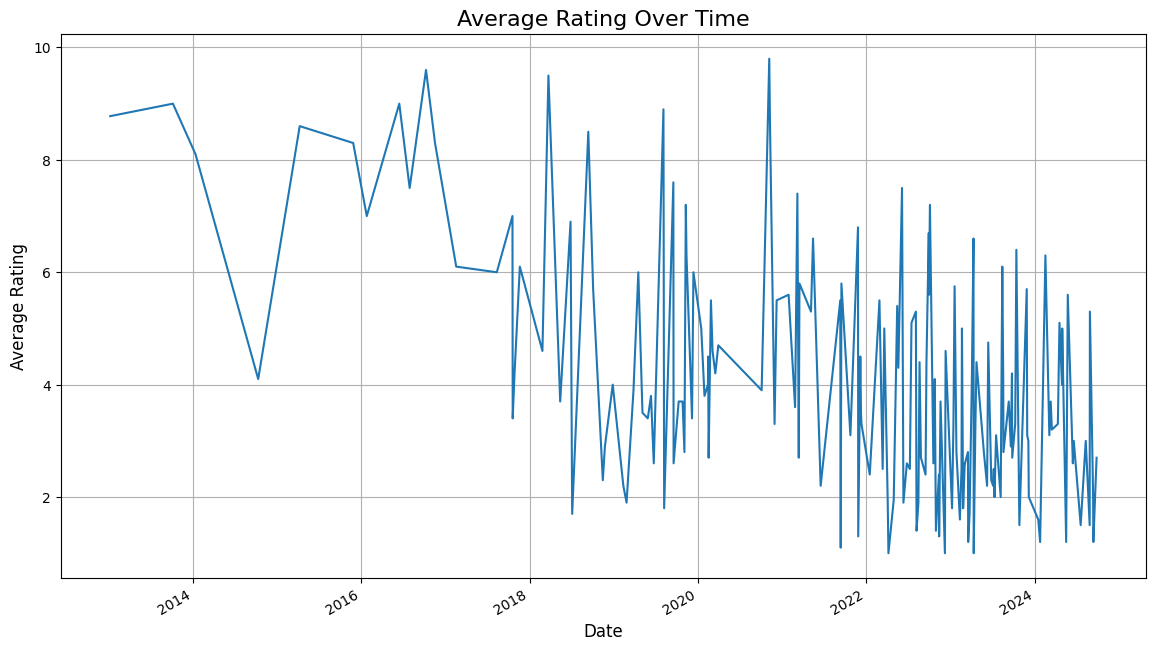

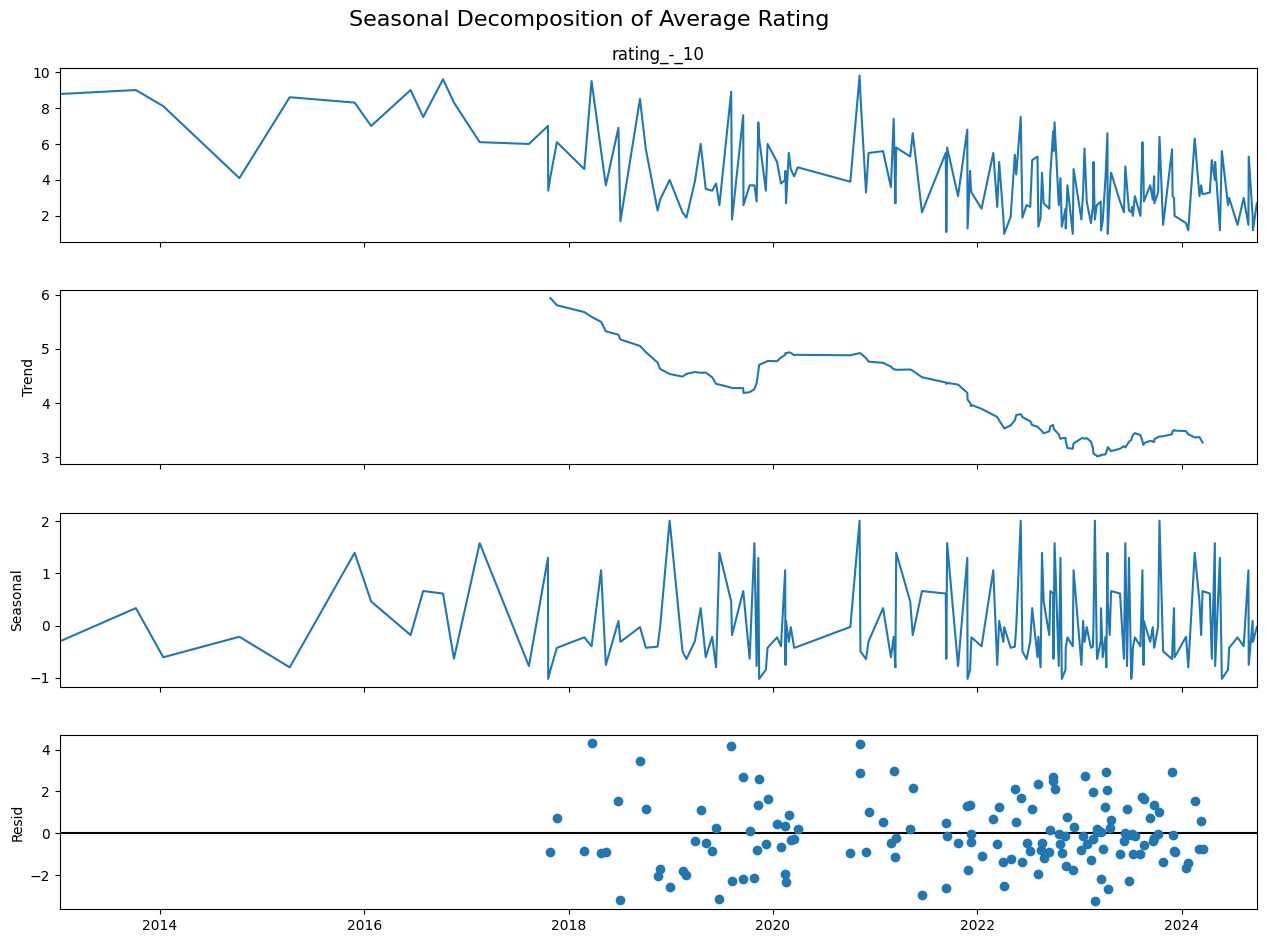

<Figure size 1000x600 with 0 Axes>

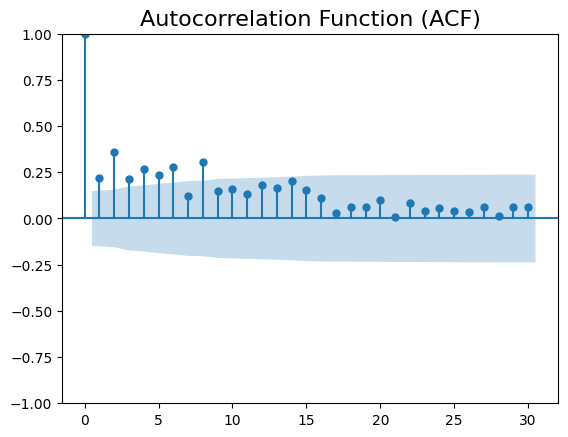

<Figure size 1000x600 with 0 Axes>

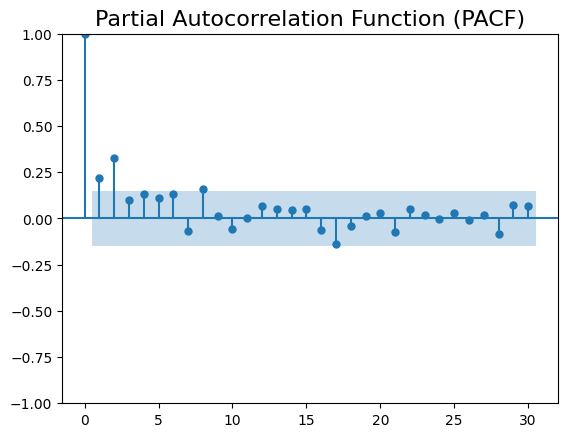

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for missing dates and drop rows with invalid dates
data = data.dropna(subset=['date'])

# Group by date to calculate average rating
time_series_data = data.groupby('date')['rating_-_10'].mean()

# Plot the time series
plt.figure(figsize=(14, 8))
time_series_data.plot()
plt.title("Average Rating Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series_data, model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Seasonal Decomposition of Average Rating", fontsize=16)
plt.show()

# Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series_data, lags=30)
plt.title("Autocorrelation Function (ACF)", fontsize=16)
plt.show()

# Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(time_series_data, lags=30, method='ywm')
plt.title("Partial Autocorrelation Function (PACF)", fontsize=16)
plt.show()


## Key Findings

- **Trend:**  
  There is a slight downward trend in average ratings over time, suggesting a decrease in overall customer satisfaction.

- **Seasonality:**  
  No significant seasonal patterns were observed, indicating that ratings are not strongly influenced by seasonal factors.

- **Autocorrelation:**  
  The ACF plot shows significant autocorrelation at lag 1, suggesting that current ratings are influenced by previous ratings.

- **Partial Autocorrelation:**  
  The PACF plot reveals a significant spike at lag 1, indicating a direct relationship between current and previous ratings.


In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Prepare the dataset
# Assume 'data' is the variable containing your dataset
df = data.copy()

# Define a function to derive sentiment labels
def derive_sentiment(row):
    if row['recommond'] == 'yes' and row['rating_-_10'] > 6:
        return 1  # Positive
    elif row['recommond'] == 'no' and row['rating_-_10'] <= 5:
        return 0  # Negative
    else:
        return 2  # Neutral

df['Sentiment_Label'] = df.apply(derive_sentiment, axis=1)

# Step 2: Oversample the Neutral class
neutral_samples = df[df['Sentiment_Label'] == 2]
neutral_oversampled = pd.concat([neutral_samples] * 10, ignore_index=True)  # Duplicate Neutral samples

# Combine oversampled Neutral with other samples
non_neutral_samples = df[df['Sentiment_Label'] != 2]
df_balanced = pd.concat([non_neutral_samples, neutral_oversampled], ignore_index=True)

# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_balanced = tfidf_vectorizer.fit_transform(df_balanced['clean_review'].astype(str))  # Convert reviews to string
y_balanced = df_balanced['Sentiment_Label']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Step 5: Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'])

# Print Results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr_model, X_balanced, y_balanced, cv=kfold, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()
std_cv_accuracy = cv_scores.std()

# Print Cross-Validation Results
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", mean_cv_accuracy)
print("CV Standard Deviation:", std_cv_accuracy)

# Step 8: Save Model and Vectorizer
import joblib
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully.")


Accuracy: 0.9280442804428044

Confusion Matrix:
 [[204  13  12]
 [  4 101  10]
 [  0   0 198]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.98      0.89      0.93       229
    Positive       0.89      0.88      0.88       115
     Neutral       0.90      1.00      0.95       198

    accuracy                           0.93       542
   macro avg       0.92      0.92      0.92       542
weighted avg       0.93      0.93      0.93       542


Cross-Validation Scores: [0.93726937 0.94833948 0.93726937 0.92804428 0.92051756]
Mean CV Accuracy: 0.9342880138598059
CV Standard Deviation: 0.009421575256169726
Model and vectorizer saved successfully.


## Model Performance

A Logistic Regression model was trained to classify sentiment using the TF-IDF vector of numerical features assigned to reviews, capturing word importance. The data was split 80/20 into training and test sets. The resultant model achieved the following:

- **Accuracy:** 92.8%  
- **Precision, Recall, F1-Score:** High scores across all classes, indicating strong predictive performance.  
- **Cross-Validation:** Consistent performance across different folds, suggesting robustness.

### Confusion Matrix Analysis:
- **True Positives:** The model correctly identifies a significant number of instances in each class.  
- **False Positives & False Negatives:** The model makes relatively few errors in classification.

### Interpretation:
The model demonstrates strong performance in classifying sentiment, particularly in identifying neutral and negative sentiments. While there is room for improvement in classifying positive sentiments, overall, the model provides reliable predictions.


In [30]:
# Apply the trained model to all rows in the dataframe
data['Predicted_Label'] = lr_model.predict(tfidf_vectorizer.transform(data['clean_review'].astype(str)))

# Map numeric labels to sentiment categories
data['Predicted_Sentiment'] = data['Predicted_Label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

# Save the classified results to a CSV file
output_file = "logisticR_classified_results.csv"
data.to_csv(output_file, index=False)

print(f"Classified results saved successfully to {output_file}.")


Classified results saved successfully to logisticR_classified_results.csv.


The tained model hasbeen deployed on to the dataframe and the results are saved to ogisticR_classified_results.csv file

<Figure size 1400x800 with 0 Axes>

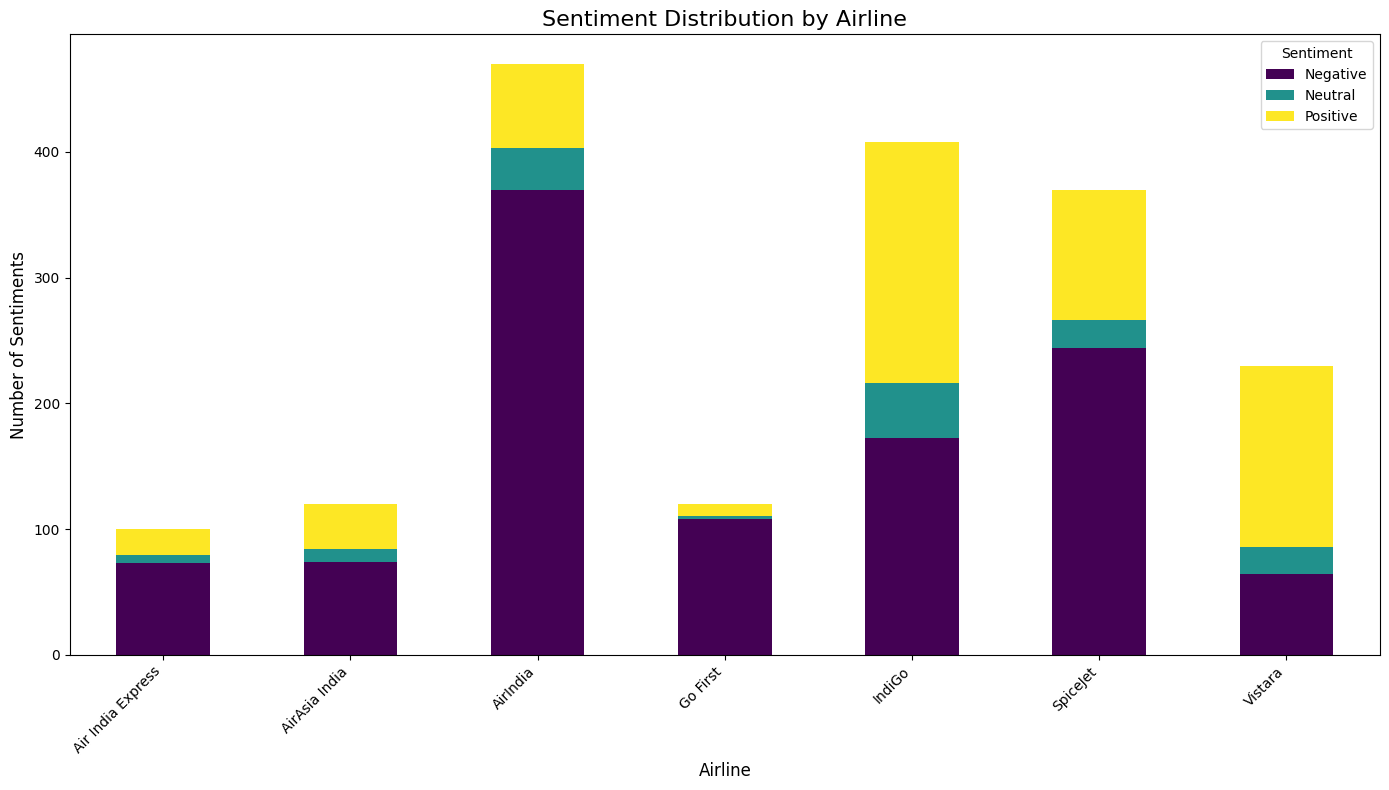

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the classified results from the saved file
classified_results_path = "logisticR_classified_results.csv"
classified_df = pd.read_csv(classified_results_path)

# Analyze sentiment distribution by airline
airline_sentiment_counts = classified_df.groupby(['airline_name', 'Predicted_Sentiment']).size().unstack(fill_value=0)

# Plot the sentiment distribution for each airline
plt.figure(figsize=(14, 8))
airline_sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Customize the plot
plt.title("Sentiment Distribution by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Sentiments", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


## Sentiment Analysis

- **Air India, IndiGo, and SpiceJet:** These airlines have the highest number of reviews, indicating a larger customer base or higher review activity.  
- **Mixed Sentiments:** All airlines exhibit a mix of positive, negative, and neutral sentiments, reflecting a diverse range of customer experiences.  
- **Negative Sentiment Prevails:** For most airlines, negative sentiment outweighs positive and neutral sentiments, suggesting areas of service that may need improvement.  
- **Vistara and Air India Express:** These airlines have a relatively higher proportion of positive sentiments, indicating a more favorable customer perception.


In [32]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = "processed_reviews_stopwrdfree.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Step 1: Clean the 'clean_review' column
def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', str(text))
    return text

# Apply cleaning to the 'clean_review' column
data['clean_review'] = data['clean_review'].apply(clean_text)

# Step 2: Tokenization (Splitting words)
data['review_stopwrdfree'] = data['clean_review'].apply(lambda x: word_tokenize(x))

# Step 3: Stopword Removal
stop_words = set(stopwords.words('english'))
data['review_stopwrdfree'] = data['review_stopwrdfree'].apply(
    lambda x: [word for word in x if word.lower() not in stop_words]
)

# Save the cleaned and processed data
output_path = "processed_reviews_stopwrdfree.csv"  # Same file name to overwrite
data.to_csv(output_path, index=False)

print(f"Processed data with punctuation removed and stopwords cleaned saved to {output_path}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sabih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed data with punctuation removed and stopwords cleaned saved to processed_reviews_stopwrdfree.csv


In [14]:
import pandas as pd
from collections import Counter
import ast

# Load the dataset (update the file path as necessary)
file_path = "processed_reviews_stopwrdfree.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure required columns exist
if 'Predicted_Sentiment' in data.columns and 'review_stopwrdfree' in data.columns:
    # Filter negative reviews
    negative_reviews = data[data['Predicted_Sentiment'] == 'Negative'].copy()

    # Convert 'review_stopwrdfree' from string to list if stored as strings
    negative_reviews.loc[:, 'review_stopwrdfree'] = negative_reviews['review_stopwrdfree'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )

    # Flatten the list of tokenized words into a single list
    all_negative_words = [word for tokens in negative_reviews['review_stopwrdfree'] for word in tokens]

    # Count word frequencies
    negative_word_counts = Counter(all_negative_words)

    # Extract the top 20 most common words
    most_common_negative_words = negative_word_counts.most_common(20)

    # Display the top keywords for negative reviews
    print("Top Keywords in Negative Reviews:")
    for word, count in most_common_negative_words:
        print(f"{word}: {count}")

    # Save the keywords for negative reviews to a CSV file
    negative_keywords_df = pd.DataFrame(most_common_negative_words, columns=["Keyword", "Count"])
    output_path = "negative_top_keywords.csv"  # Adjust the output file path as necessary
    negative_keywords_df.to_csv(output_path, index=False)

    print(f"\nKeywords for negative reviews saved to {output_path}.")
else:
    print("The required columns 'Predicted_Sentiment' and 'review_stopwrdfree' are not present in the dataset.")


Top Keywords in Negative Reviews:
flight: 2521
time: 734
India: 675
airline: 659
staff: 612
Air: 597
hours: 552
Delhi: 547
service: 520
experience: 514
us: 483
even: 459
airport: 459
delayed: 420
one: 406
Verified: 392
customer: 376
luggage: 350
seats: 349
get: 340

Keywords for negative reviews saved to negative_top_keywords.csv.


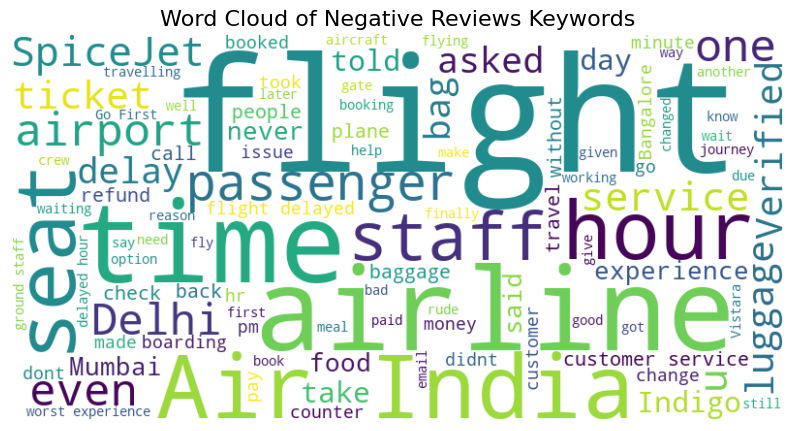

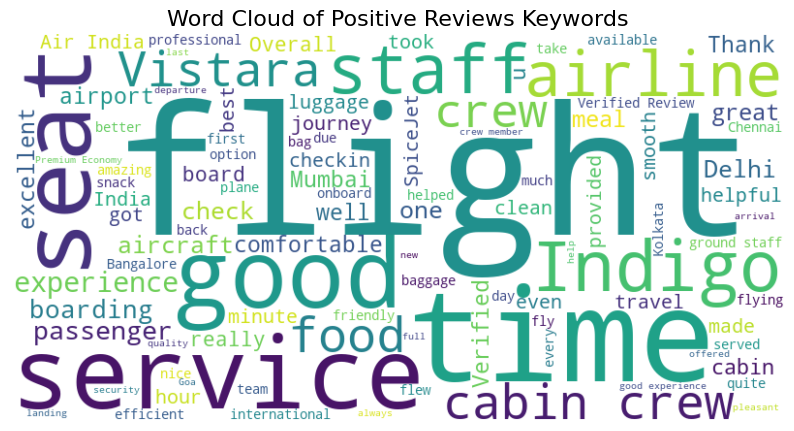

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import ast

# Load the dataset
file_path = "processed_reviews_stopwrdfree.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Convert the 'review_stopwrdfree' column from strings to lists
data['review_stopwrdfree'] = data['review_stopwrdfree'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Filter positive and negative reviews
positive_reviews = data[data['Predicted_Sentiment'] == 'Positive']
negative_reviews = data[data['Predicted_Sentiment'] == 'Negative']

# Function to generate and display word cloud
def generate_word_cloud(reviews, title):
    words = " ".join([" ".join(tokens) for tokens in reviews['review_stopwrdfree']])
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(words)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word cloud for negative reviews
generate_word_cloud(negative_reviews, "Word Cloud of Negative Reviews Keywords")

# Generate word cloud for positive reviews
generate_word_cloud(positive_reviews, "Word Cloud of Positive Reviews Keywords")


## Word Cloud Analysis  

Word clouds were generated for both positive and negative sentiments based on the prediction results. These highlight the key words or features contributing to each sentiment, providing insights into:  

- **Positive Sentiments:** Words reflecting strengths and favorable aspects of the airlines, such as exceptional service, comfort, or punctuality.  
- **Negative Sentiments:** Words indicating weaknesses or areas for improvement, such as delays, poor customer service, or uncomfortable seating.  

This analysis helps airlines identify their strengths to leverage and weaknesses to address for enhancing customer satisfaction.  


## **Key Findings and Recommendations**  

### **Key Findings:**  

- **Mixed Sentiment:** While some airlines have a higher proportion of positive reviews, negative sentiments are prevalent across the industry.  
- **Key Issues:** Negative reviews frequently cite flight delays, poor customer service, baggage handling problems, and subpar in-flight experiences.  
- **Top-Performing Airlines:** Vistara and Air India Express demonstrate relatively higher customer satisfaction rates, increasing the likelihood of customer retention.  
- **Areas for Improvement:** Airlines like Air India and IndiGo, despite their extensive reach, have garnered significant negative customer feedback. This highlights the need for improvement in on-time performance, customer service, and baggage handling.  
- **Time Series Trends:** The overall trend in average ratings appears stable, but observed fluctuations may be influenced by prior ratings or internal initiatives.  

### **Recommendations:**  

1. **Prioritize On-Time Performance:**  
   Address flight delays and cancellations by implementing real-time tracking systems to improve reliability and reduce customer frustration.  

2. **Enhance Customer Service:**  
   Invest in comprehensive staff training for both online and offline interactions. Incorporating virtual services like chatbots can further streamline customer support.  

3. **Improve Baggage Handling:**  
   Adopt advanced baggage handling solutions, such as RFID tracking, to minimize customer frustration caused by lost, damaged or delayed baggage.  

4. **Optimize In-Flight Experience:**  
   Provide a plesent flying experience with amenities like comfortable seating, adequate legroom, and good-quality in-flight meals and entertainment.  

5. **Leverage Data Analytics:**  
   Use data analytics to uncover trends, patterns, and areas for improvement, giving airlines a competitive edge.  

6. **Implement Feedback Mechanisms:**  
   Actively gather and analyze customer feedback to address issues promptly and implement preventative measures for crisis management.  
